<a href="https://colab.research.google.com/github/Attempt99/Apartment_Rates/blob/master/Denver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following work book runs my ARIMA model for 1 year projections and t test to compare 2019 rates and the projected rates
3 test will be ran from this wookbook for studio, 1br and 2br. the information will then be used in excel and tableau to create bar and line charts for my presentation.

** Use account David.A.Sharp@gmail.com for mounting**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
import itertools
import warnings

here I imported the file and set the index, changed date column to a datetime format and set the frequency for months

In [0]:
path = "/content/drive/My Drive/Thinkful/capstone3/denver/Denver.csv"
def parser(x):
    return '{:%Y-%m}'.format(datetime.strptime(x,'%Y_%m'))
rent= pd.read_csv(path,index_col=0, parse_dates=[0] ,date_parser=parser)
rent.index.to_period('M')

PeriodIndex(['2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
             '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
             '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
             '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
             '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
             '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
             '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
             '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
             '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12'],
            dtype='period[M]', name='date', freq='M

In [0]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2014-01-01 to 2019-12-01
Data columns (total 3 columns):
Studio    72 non-null int64
1br       72 non-null int64
2br       72 non-null int64
dtypes: int64(3)
memory usage: 2.2 KB


 a quick null test of the data

In [0]:
rent.isnull().any()

Studio    False
1br       False
2br       False
dtype: bool

use the names set for each catagory to run different tests.

In [0]:
studio=rent['Studio']
onebr=rent['1br']
twobr=rent['2br']

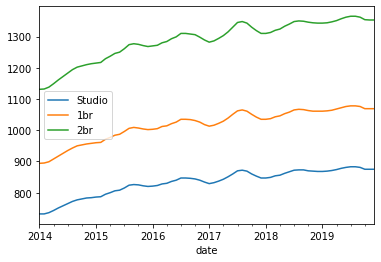

In [0]:
rent.plot()

In [0]:
catagory=twobr

to run test on different catagory use name from list above and input in 

```
# ARIMA(*catagory name*,order=p, d, q)
```
also if when ran a error comes up just change the p d q #'s till runs


In [0]:
model_arima = ARIMA(catagory,order=(0, 1, 3))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)
residuals=DataFrame(model_arima_fit.resid)

394.9547581011139


In [0]:
print(model_arima_fit.summary())
print(residuals.describe())

                             ARIMA Model Results                              
Dep. Variable:                  D.2br   No. Observations:                   71
Model:                 ARIMA(0, 1, 3)   Log Likelihood                -192.477
Method:                       css-mle   S.D. of innovations              3.574
Date:                Mon, 17 Feb 2020   AIC                            394.955
Time:                        21:50:54   BIC                            406.268
Sample:                    02-01-2014   HQIC                           399.454
                         - 12-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.0873      1.318      2.342      0.022       0.504       5.671
ma.L1.D.2br     0.9977      0.113      8.807      0.000       0.776       1.220
ma.L2.D.2br     0.9773      0.130      7.519    

In [0]:
predictions= model_arima_fit.forecast(steps=12)[0]
predictions

array([1358.63756077, 1361.02230645, 1363.79443031, 1366.88171468,
       1369.96899905, 1373.05628342, 1376.1435678 , 1379.23085217,
       1382.31813654, 1385.40542091, 1388.49270529, 1391.57998966])

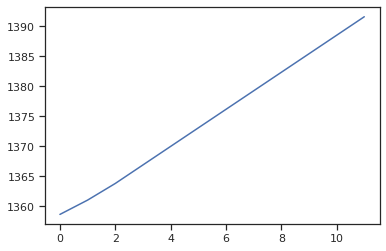

In [0]:
plt.plot(predictions)

The next 2 cells are to find the best pdq for the ARIMA model

In [0]:
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

change catagory name

In [0]:
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(catagory,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 805.7354132592351
(0, 0, 1) 718.6074170967088
(0, 1, 0) 467.9440994673186
(0, 1, 1) 432.8821765490904
(0, 1, 3) 394.9547581011139
(0, 1, 4) 396.88903870159095
(0, 2, 0) 414.663377480988
(0, 2, 1) 415.78484753244436
(0, 2, 2) 413.93481188604346
(0, 2, 3) 391.8177188708531
(0, 2, 4) 392.24858459147447
(1, 0, 0) 497.5068201207963
(1, 0, 1) 457.5393451384442
(1, 0, 2) 415.9741091796334
(1, 0, 3) 413.9091149169772
(1, 0, 4) 415.4317023572727
(1, 1, 0) 412.8732005028618
(1, 1, 1) 411.9686285223403
(1, 1, 2) 394.8370940481266
(1, 2, 0) 415.4805698240522
(1, 2, 1) 410.6166782416384
(1, 2, 2) 409.61264836700235
(2, 0, 0) 427.9558823570514
(2, 0, 1) 427.68245370345767
(2, 0, 2) 413.04459871692666
(2, 1, 0) 408.6134629255366
(2, 1, 1) 400.22053521047997
(2, 1, 2) 398.225136808592
(2, 2, 0) 416.07490814099145
(2, 2, 1) 405.9133883437902
(2, 2, 2) 386.92665633813783
(3, 0, 0) 425.59355018427823
(3, 0, 1) 436.91091809827867
(3, 0, 2) 441.84005651046107
(3, 1, 0) 396.79117958390293
(3, 1, 1

Here I am taking the 2019 rates and running them in a t test against the projected rates

change catagory name

In [0]:
test = catagory[60:]

In [0]:
from scipy import stats
import math

In [0]:
stats.ttest_ind(test,predictions)

Ttest_indResult(statistic=-5.18155773426319, pvalue=3.398022900004006e-05)

In [0]:
stats.pearsonr(test,predictions)

(0.5181783157937188, 0.08437755082120452)

this will install pingouin, i found that by using it for the t test it gave a cleaner look and more information around the t test.

In [0]:
pip install --upgrade pingouin

In [0]:
import pingouin as pg

In [0]:
pg.ttest(test,predictions)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-5.182,22,two-sided,0.000034,"[-28.07, -12.02]",2.115,509.863,0.999


In [0]:
test.describe()

count      12.000000
mean     1354.666667
std         7.714606
min      1343.000000
25%      1350.000000
50%      1353.500000
75%      1362.000000
max      1365.000000
Name: 2br, dtype: float64

In [0]:
s=pd.Series(predictions)

In [0]:
s.describe()

count      12.000000
mean     1374.710997
std        10.957141
min      1358.637561
25%      1366.109894
50%      1374.599926
75%      1383.089958
max      1391.579990
dtype: float64